In [1]:
import torch
import matplotlib.pyplot as plt
import glob

/home/mwagner/bin/anaconda3/envs/hcprediction/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


- Main_clean.py:    main script to train/test model
- --input: user definied input sequence

- .pth: PyTorch saved model states --> typically a dictionary

In [ ]:
env1 = glob.glob("./Elman_")

In [8]:
!ls ../data/

data_pca.pkl					  Ns200_SeqN100_2Batch.pth.tar
InputNs50_SeqN100_StraightTraj_Marcus_v2.pth.tar  Ns200_SeqN100_2.pth.tar
Ns200_SeqN100_1.pth.tar				  SeqN1T100.pth.tar


In [11]:
# get all possible inputs
inputs = glob.glob("../data/*SeqN100*")
inputs.remove("../data/InputNs50_SeqN100_StraightTraj_Marcus_v2.pth.tar")
inputs.remove("../data/Ns200_SeqN100_2Batch.pth.tar")
inputs.sort()
print(inputs)

['../data/Ns200_SeqN100_1.pth.tar', '../data/Ns200_SeqN100_2.pth.tar']


In [13]:
def plot_input(fname):
    loaded = torch.load(fname)
    # keys: X_mini, Target_mini
    X_mini = loaded["X_mini"]  # input
    Target_mini = loaded["Target_mini"]  # output

    print(
        "Max value:",
        round(X_mini.max().item(), 3),
        "\tMin value:",
        round(X_mini.min().item(), 3),
    )
    plt.imshow(X_mini.reshape((100, 200)))
    plt.xlabel("Neuron")
    plt.ylabel("Time (a.u.)")
    plt.title(fname)
    plt.show()

See: Figure4.py for how the Gaussian input data was constructed.

../data/Ns200_SeqN100_1.pth.tar
Max value: 1.0 	Min value: 0.0


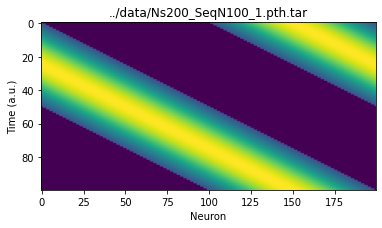

../data/Ns200_SeqN100_2.pth.tar
Max value: 1.0 	Min value: 0.0


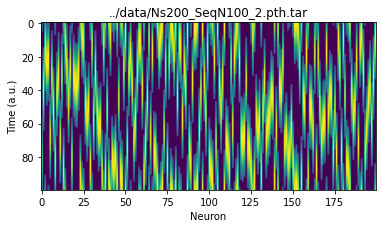

In [14]:
for i in inputs:
    print(i)
    plot_input(i)

In [ ]:
loaded = torch.load("../data/Ns200_SeqN100_2Batch.pth.tar")
# keys: X_mini, Target_mini
X_mini = loaded["X_mini"]  # input
Target_mini = loaded["Target_mini"]  # output

print(
    "Max value:",
    round(X_mini.max().item(), 3),
    "\tMin value:",
    round(X_mini.min().item(), 3),
)

Max value: 1.0 	Min value: 0.0


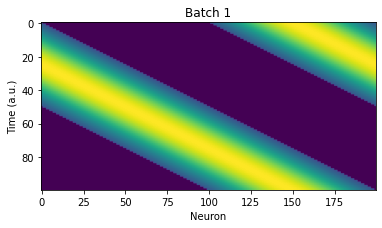

In [17]:
plt.imshow(X_mini[0, :, :].reshape((100, 200)))
plt.xlabel("Neuron")
plt.ylabel("Time (a.u.)")
plt.title("Batch 1")
plt.show()

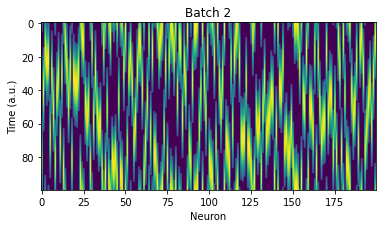

In [18]:
plt.imshow(X_mini[1, :, :].reshape((100, 200)))
plt.xlabel("Neuron")
plt.ylabel("Time (a.u.)")
plt.title("Batch 2")
plt.show()

BATCH: 1
Max values
	X_mini: 1.0
	Target_mini: 1.0
Min values
	X_mini: 0.0
	Target_mini: 0.0


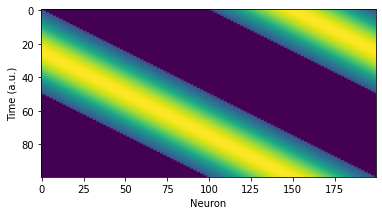

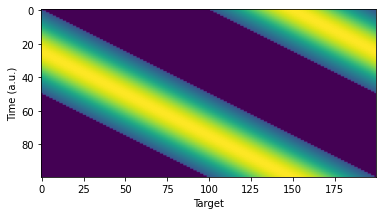


BATCH: 2
Max values
	X_mini: 1.0
	Target_mini: 1.0
Min values
	X_mini: 0.0
	Target_mini: 0.0


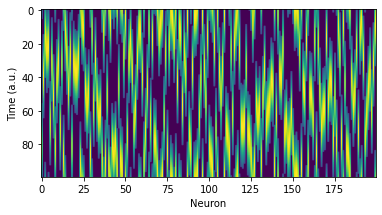

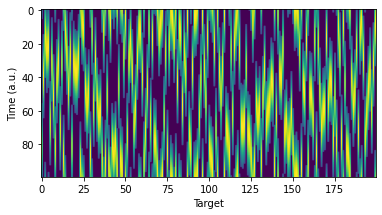

In [31]:
# Sombrero input
sombrero = torch.load(
    "./data/Ns200_SeqN100_2Batch.pth.tar"
)  # keys: X_mini, Target_mini
X_mini = sombrero["X_mini"]
Target_mini = sombrero["Target_mini"]
n_batches = X_mini.shape[0]

for i in range(n_batches):
    print(f"BATCH: {i+1}")
    print("Max values")
    print(f"\tX_mini: {round(X_mini[i, :, :].max().item(), 3)}")
    print(f"\tTarget_mini: {round(Target_mini[i, :, :].max().item(), 3)}")
    print("Min values")
    print(f"\tX_mini: {round(X_mini[i, :, :].min().item(), 3)}")
    print(f"\tTarget_mini: {round(Target_mini[i, :, :].min().item(), 3)}")
    plt.imshow(X_mini[i, :, :])
    plt.xlabel("Neuron")
    plt.ylabel("Time (a.u.)")
    plt.show()
    plt.imshow(Target_mini[i, :, :])
    plt.xlabel("Target")
    plt.ylabel("Time (a.u.)")
    plt.show()
    print()

In [11]:
X_mini.shape

torch.Size([2, 100, 200])

In [12]:
Target_mini.shape

torch.Size([2, 100, 200])

The 1D Mexican hat function (Ricker wavelet) is defined as:

$
\psi(x) = \left(1 - \frac{x^2}{\sigma^2}\right) \exp\left(-\frac{x^2}{2\sigma^2}\right)
$

where:
- $\psi$ is the Mexican hat function
- $x, y$ are spatial coordinates
- $\sigma$ is the scale (controls width of the peak and surrounding dip)

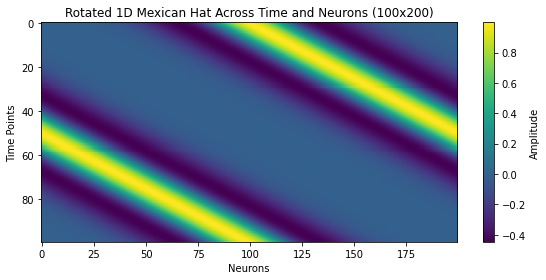

In [5]:
""" Mexican hat input """

import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 100  # time points
N = 200  # neurons
sigma = 1.0

# Generate 1D Mexican hat (Ricker wavelet)
x = np.linspace(-5, 5, N)
mexican_hat_1d = (1 - (x**2 / sigma**2)) * np.exp(-(x**2) / (2 * sigma**2))

# Create a rotated version by shifting it diagonally across time
mexican_hat_rotated = np.zeros((T, N))
for t in range(T):
    shift = int((t / T) * N)  # left-to-right diagonal
    x_shifted = np.roll(mexican_hat_1d, shift)
    mexican_hat_rotated[t] = x_shifted

"""
# Shift downward (time) and leftward (neurons)
shift_time = -20  # -20  # shift rows down
shift_neuron = 0  # -20  # shift columns left
# Apply 2D roll
shifted_mexican_hat = np.roll(mexican_hat_rotated, shift=shift_time, axis=0)
shifted_mexican_hat = np.roll(shifted_mexican_hat, shift=shift_neuron, axis=1)
"""

# Plot
plt.figure(figsize=(8, 4))
plt.imshow(mexican_hat_rotated, cmap="viridis", aspect="auto")
plt.colorbar(label="Amplitude")
plt.title("Rotated 1D Mexican Hat Across Time and Neurons (100x200)")
plt.xlabel("Neurons")
plt.ylabel("Time Points")
plt.tight_layout()
plt.show()

Impulse/one-hot encoding instead

Max value: 1.0 	Min value: 0.0


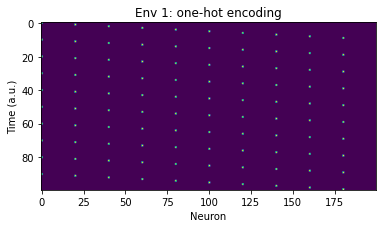

In [23]:
# One-hot encoding
import numpy as np
import torch

# params
N, TotalSteps, T = 200, 2000, 100

# one-hot around a ring: exactly one active neuron per timestep
X = np.zeros((N, TotalSteps), dtype=np.float32)
step_size = 1  # how many neurons you advance per time step (must be 1..N-1)
pos = (step_size * np.arange(TotalSteps)) % N
X[pos, np.arange(TotalSteps)] = 1.0

# downsample columns as to batch
Select_T = np.arange(0, TotalSteps, TotalSteps // T, dtype=int)
tmp = np.expand_dims(X[:, Select_T].T, axis=0)  # shape: (1, T, N)
X_mini = torch.tensor(tmp)  # ready for an RNN: (batch=1, T, N)

print(
    "Max value:",
    round(X_mini.max().item(), 3),
    "\tMin value:",
    round(X_mini.min().item(), 3),
)
plt.imshow(X_mini.reshape((100, 200)))
plt.xlabel("Neuron")
plt.ylabel("Time (a.u.)")
plt.title("Env 1: one-hot encoding")
plt.show()

In [27]:
np.argwhere(X_mini)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74

In [25]:
X_mini[0, 0, :]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [26]:
X_mini[0, 1, :]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

Benefits of k-hot encoding
- explicit control of sparsity & width
- clean ring topology (circular wrap-around)
- translation invariance
- stable signal magnitude
- controllable speed & coverage
- biologically motivated: k-hot better approximates finite-width place fields compared to one-hot.

In [28]:
# k-hot encoding (width w)
import numpy as np
import torch

# --- params ---
N = 200  # number of neurons (positions on ring)
TotalSteps = 2000  # total timesteps
T = 100  # timesteps you’ll keep after downsampling
w = 5  # place-field width (# of simultaneously active neurons)
step_size = 1  # how many neurons you advance per timestep (speed on the ring)
normalize = True  # keep constant per-timestep magnitude

# --- positions over time (wraps around the ring) ---
# choose step_size coprime with N to visit all neurons before repeating
pos = (step_size * np.arange(TotalSteps)) % N  # shape: (TotalSteps,)

# --- build k-hot indices (vectorized) ---
# offsets defining the contiguous window of width w, centered-ish on pos
# e.g., w=5 -> offsets = [-2, -1, 0, +1, +2]
half = (w - 1) // 2
offsets = np.arange(-half, -half + w)  # shape: (w,)

# indices of active neurons at each time step, with wrap-around
idx_neurons = (pos[np.newaxis, :] + offsets[:, np.newaxis]) % N  # (w, TotalSteps)

# --- fill activity matrix ---
X = np.zeros((N, TotalSteps), dtype=np.float32)
# advanced indexing: flatten neuron indices and repeat time indices w times
X[idx_neurons.reshape(-1), np.repeat(np.arange(TotalSteps), w)] = 1.0

# optional: keep constant energy per time step (e.g., average activation = 1 or L2)
if normalize:
    X /= w  # now each column sums to 1 (probability-like)

# --- downsample to T frames like your original code ---
Select_T = np.arange(0, TotalSteps, TotalSteps // T, dtype=int)
tmp = np.expand_dims(X[:, Select_T].T, axis=0)  # (1, T, N)
X_mini = torch.tensor(tmp)  # ready for an RNN

In [30]:
X_mini.shape

torch.Size([1, 100, 200])

Max value: 0.2 	Min value: 0.0


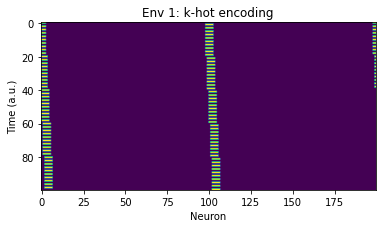

In [43]:
print(
    "Max value:",
    round(X_mini.max().item(), 3),
    "\tMin value:",
    round(X_mini.min().item(), 3),
)
plt.imshow(X_mini.reshape((100, 200)))
plt.xlabel("Neuron")
plt.ylabel("Time (a.u.)")
plt.title("Env 1: k-hot encoding")
plt.show()

In [33]:
X_mini.shape

torch.Size([1, 100, 200])

In [40]:
np.argwhere(X_mini[0, :, :])[0]

tensor([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,
         3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,
         7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10,
        10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14,
        14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17,
        18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21,
        21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25,
        25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28,
        28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32,
        32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35,
        36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39,
        39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 43,
        43, 43, 43, 43, 44, 44, 44, 44, 

In [42]:
np.argwhere(X_mini[0, :, :])[1]

tensor([  0,   1,   2, 198, 199,  98,  99, 100, 101, 102,   0,   1,   2, 198,
        199,  98,  99, 100, 101, 102,   0,   1,   2, 198, 199,  98,  99, 100,
        101, 102,   0,   1,   2, 198, 199,  98,  99, 100, 101, 102,   0,   1,
          2, 198, 199,  98,  99, 100, 101, 102,   0,   1,   2, 198, 199,  98,
         99, 100, 101, 102,   0,   1,   2, 198, 199,  98,  99, 100, 101, 102,
          0,   1,   2, 198, 199,  98,  99, 100, 101, 102,   0,   1,   2, 198,
        199,  98,  99, 100, 101, 102,   0,   1,   2, 198, 199,  98,  99, 100,
        101, 102,   0,   1,   2,   3, 199,  99, 100, 101, 102, 103,   0,   1,
          2,   3, 199,  99, 100, 101, 102, 103,   0,   1,   2,   3, 199,  99,
        100, 101, 102, 103,   0,   1,   2,   3, 199,  99, 100, 101, 102, 103,
          0,   1,   2,   3, 199,  99, 100, 101, 102, 103,   0,   1,   2,   3,
        199,  99, 100, 101, 102, 103,   0,   1,   2,   3, 199,  99, 100, 101,
        102, 103,   0,   1,   2,   3, 199,  99, 100, 101, 102, 1